In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive


 1-17884e44-f405-4a9f-b1dd-294a31b5ea52.pdf
'12th marksheet (1).pdf'
'12th marksheet.pdf'
 16922842694954599991890927283373.jpg
 16922849393411420781964051619826.jpg
 16922849675671516247531467330633.jpg
 16922849920156717541270073234573.jpg
 16922853449003341261795697603100.jpg
'20HS211- Heriatge of Tamils MCQ'
'20HS211- Heriatge of Tamils MCQ.rar'
'2253043-Sandhya T.pptx'
'7.Electrochromic DEVICE_ppt--converted_copy.pdf'
 aadhar.pdf
'abstract final.pdf'
'A&C CLASS STACK.gslides'
'ACD ALM (1).pdf'
'ACD ALM (2).pdf'
'ACD ALM (3).pdf'
'ACD ALM (4).pdf'
'ACD ALM (5).pdf'
'ACD ALM (6).pdf'
'ACD ALM.pdf'
'Adobe Scan 17-Aug-2023.pdf'
'ASSIGNMENT WT QUESTIONS.gdoc'
'Candidate No 514.pdf'
'can_intrusion_dataset_full1 (1).csv'
 can_intrusion_dataset_full1.csv
 certificate_bddb92e49f2cd3800d58400e96b3ef79.pdf
 Chapter_4_v8.0.gslides
 CIIT2025.pdf
 Classroom
 cloud_capstone_final.pdf
'CLOUD COMPUTING_MODULE1.gslides'
'CLOUD EXP 4.gdoc'
'Colab Notebooks'
'COLLECTION FRAMEWORK.gslides'
'community 

In [ ]:
!cp /content/drive/MyDrive/Student_attention.zip /content/


In [ ]:
!unzip Student_attention.zip


Archive:  Student_attention.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/focused11701_png_jpg.rf.ba996c59b7ddf49ce5bfb8d6c6fce246.jpg  
 extracting: test/images/focused13201_png_jpg.rf.a81e2935e17cf5ecbfe3357af763a2fa.jpg  
 extracting: test/images/head_down00701_png_jpg.rf.8698ac27535014fb9d28cc245c95c569.jpg  
 extracting: test/images/head_down01001_png_jpg.rf.5f16dcab159e28fe52d6c48583b26a7a.jpg  
 extracting: test/images/head_down01601_png_jpg.rf.4a5405408adfee56bbea91e60eb911da.jpg  
 extracting: test/images/head_down04301_png_jpg.rf.65ec76e41e89f5e36f46e16b6cdb96eb.jpg  
 extracting: test/images/head_down06501_png_jpg.rf.ea20b126de99a9931f2a2cb14117496c.jpg  
 extracting: test/images/head_down10801_png_jpg.rf.6c45bb032977611d511bfc53c1726102.jpg  
 extracting: test/images/head_down11001_png_jpg.rf.c4fb415209b971f077c70d3b5cf6a054.jpg  
 ex

In [ ]:
!ls /content


data.yaml  README.dataset.txt	sample_data	       test   valid
drive	   README.roboflow.txt	Student_attention.zip  train


In [ ]:
!cat /content/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['face-eye-closed', 'face-eye-opened', 'head-down']

roboflow:
  workspace: project1-bqszr
  project: student-attention
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/project1-bqszr/student-attention/dataset/2

In [ ]:
import cv2, os, random

IMG_DIR = "/content/train/images"
LBL_DIR = "/content/train/labels"

BASE_OUT = "/content/classification_data"
TRAIN_OUT = BASE_OUT + "/train"
VAL_OUT   = BASE_OUT + "/val"
TEST_OUT  = BASE_OUT + "/test"

for split in [TRAIN_OUT, VAL_OUT, TEST_OUT]:
    os.makedirs(split + "/Attentive", exist_ok=True)
    os.makedirs(split + "/Not_Attentive", exist_ok=True)

samples = []

for img_name in os.listdir(IMG_DIR):
    if not img_name.endswith(".jpg"):
        continue

    img_path = os.path.join(IMG_DIR, img_name)
    lbl_path = os.path.join(LBL_DIR, img_name.replace(".jpg", ".txt"))

    if not os.path.exists(lbl_path):
        continue

    img = cv2.imread(img_path)
    h, w, _ = img.shape

    with open(lbl_path) as f:
        lines = f.readlines()

    for line in lines:
        cls, x, y, bw, bh = map(float, line.split())

        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)

        crop = img[max(0,y1):min(h,y2), max(0,x1):min(w,x2)]
        if crop.size == 0:
            continue

        label = "Attentive" if int(cls) == 1 else "Not_Attentive"
        samples.append((crop, label))

# shuffle & split
random.shuffle(samples)
n = len(samples)
train_end = int(0.7 * n)
val_end   = int(0.85 * n)

splits = {
    "train": samples[:train_end],
    "val":   samples[train_end:val_end],
    "test":  samples[val_end:]
}

for split, data in splits.items():
    for i, (img, label) in enumerate(data):
        cv2.imwrite(f"{BASE_OUT}/{split}/{label}/{split}_{i}.jpg", img)

print("✅ Dataset prepared")
print("Total samples:", n)


✅ Dataset prepared
Total samples: 3647


In [ ]:
!ls /content/classification_data/train
!ls /content/classification_data/train/Attentive | head
!ls /content/classification_data/train/Not_Attentive | head


Attentive  Not_Attentive
train_0.jpg
train_1001.jpg
train_1006.jpg
train_1007.jpg
train_1009.jpg
train_1014.jpg
train_1019.jpg
train_1023.jpg
train_1024.jpg
train_1025.jpg
train_1000.jpg
train_1002.jpg
train_1003.jpg
train_1004.jpg
train_1005.jpg
train_1008.jpg
train_100.jpg
train_1010.jpg
train_1011.jpg
train_1012.jpg


In [ ]:
!ls /content/classification_data/train/Not_Attentive | head


train_1000.jpg
train_1002.jpg
train_1003.jpg
train_1004.jpg
train_1005.jpg
train_1008.jpg
train_100.jpg
train_1010.jpg
train_1011.jpg
train_1012.jpg


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.debugging.set_log_device_placement(True)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "/content/classification_data/train",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "/content/classification_data/val",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "/content/classification_data/test",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

print(train_gen.class_indices)


Found 2552 images belonging to 2 classes.
Found 547 images belonging to 2 classes.
Found 548 images belonging to 2 classes.
{'Attentive': 0, 'Not_Attentive': 1}


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:loc

In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost

In [ ]:
model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localh

In [ ]:
tf.debugging.set_log_device_placement(False)


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=2
)


Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 1/10
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_multi_step_on_iterator_8583 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in devic

In [ ]:
model.save("/content/attention_classifier_mobilenetv2.h5")


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /j

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
yolo_model = YOLO("yolov8n.pt")  # pretrained YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import tensorflow as tf
classifier = tf.keras.models.load_model(
    "/content/attention_classifier_mobilenetv2.h5"
)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:loca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [ ]:
import cv2
import numpy as np

img = cv2.imread("/content/test/images/focused13201_png_jpg.rf.a81e2935e17cf5ecbfe3357af763a2fa.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [ ]:
from ultralytics import YOLO
yolo_model = YOLO("yolov8n.pt")


In [ ]:
results = yolo_model(img_rgb)
boxes = results[0].boxes



0: 640x640 13 persons, 1 bench, 8.7ms
Speed: 4.0ms preprocess, 8.7ms inference, 42.5ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
import tensorflow as tf


In [ ]:
classifier = tf.keras.models.load_model(
    "/content/attention_classifier_mobilenetv2.h5"
)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:loca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [ ]:
# Last epoch metrics
train_loss = history.history['loss'][-1]
train_acc  = history.history['accuracy'][-1]
val_loss   = history.history['val_loss'][-1]
val_acc    = history.history['val_accuracy'][-1]

print("📊 Final Training Metrics")
print(f"Training Accuracy : {train_acc*100:.2f}%")
print(f"Training Loss     : {train_loss:.4f}")
print(f"Validation Accuracy : {val_acc*100:.2f}%")
print(f"Validation Loss     : {val_loss:.4f}")


📊 Final Training Metrics
Training Accuracy : 96.12%
Training Loss     : 0.1383
Validation Accuracy : 93.78%
Validation Loss     : 0.1686


In [ ]:
import cv2
import numpy as np

img_path = "/content/test/images/focused13201_png_jpg.rf.a81e2935e17cf5ecbfe3357af763a2fa.jpg"
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Image not found or unreadable: {img_path}")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = yolo_model(img_rgb)

for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])      # YOLO class
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        h = y2 - y1
        head_y2 = y1 + int(0.45 * h)   # top 45% = head region

        crop = img_rgb[y1:head_y2, x1:x2]


        if crop.size == 0:
            continue

        # preprocess EXACTLY like training
        crop = cv2.resize(crop, (224, 224))
        crop = crop / 255.0
        crop = np.expand_dims(crop, axis=0)

        pred = classifier.predict(crop)[0][0]

        # FINAL decision
        if pred < 0.5:
            label = "Attentive"
            color = (0, 255, 0)
        else:
            label = "Not Attentive"
            color = (0, 0, 255)

        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(
            img, label,
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.8, color, 2
        )



0: 640x640 13 persons, 1 bench, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:

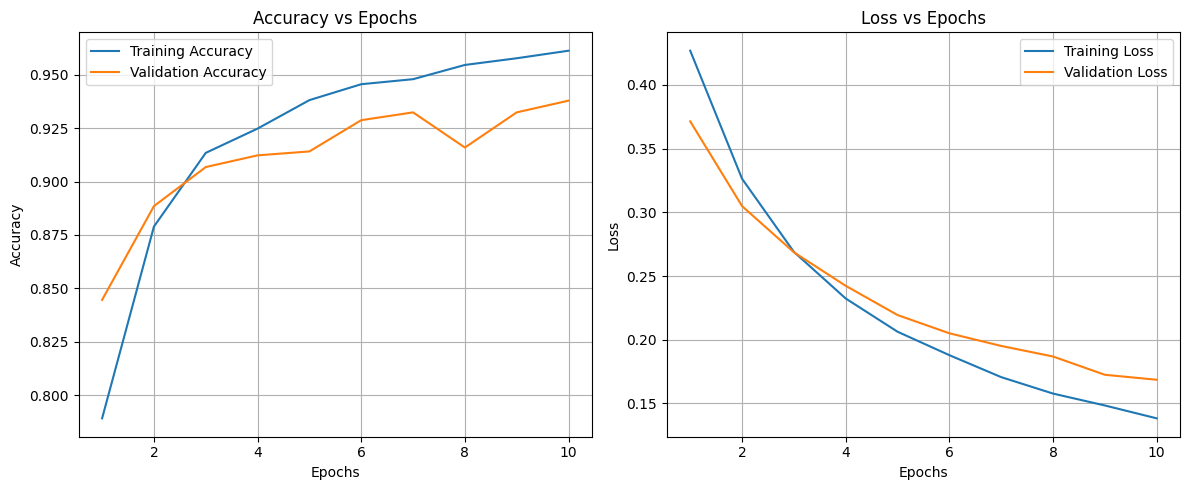

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
cv2.imwrite("/content/attention_result.jpg", img)
print("Saved as attention_result.jpg")


Saved as attention_result.jpg


In [ ]:
!ls /content


attention_classifier_mobilenetv2.h5  README.dataset.txt     test
attention_result.jpg		     README.roboflow.txt    train
classification_data		     runs		    valid
data.yaml			     sample_data	    yolov8n.pt
drive				     Student_attention.zip


Attentive: 867 images


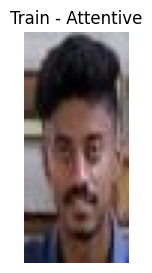

Not_Attentive: 1685 images


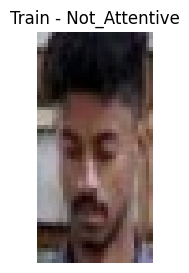

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

for label in ["Attentive", "Not_Attentive"]:
    folder = f"/content/classification_data/train/{label}"

    files = os.listdir(folder)
    print(f"{label}: {len(files)} images")

    img_path = os.path.join(folder, files[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(3,3))
    plt.title(f"Train - {label}")
    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [ ]:
val_loss, val_acc = model.evaluate(val_gen, verbose=1)

print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_multi_step_on_iterator_11027 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in device /job:loc

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model(
    "/content/attention_classifier_mobilenetv2.h5"
)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:loca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    "/content/classification_data/test",  # ✅ CORRECT PATH
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

print(test_gen.class_indices)


Found 548 images belonging to 2 classes.
{'Attentive': 0, 'Not_Attentive': 1}


In [ ]:
test_loss, test_accuracy = model.evaluate(test_gen)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Execu

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

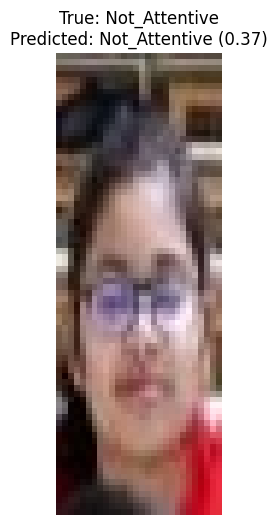

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Pick ONE random test image
base = "/content/classification_data/test"
true_label = random.choice(["Attentive", "Not_Attentive"])
img_name = random.choice(os.listdir(os.path.join(base, true_label)))
img_path = os.path.join(base, true_label, img_name)

# Load & preprocess
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (224,224)) / 255.0
img_input = np.expand_dims(img_resized, axis=0)

# Predict
pred = model.predict(img_input)[0][0]
pred_label = "Attentive" if pred >= 0.5 else "Not_Attentive"

# Display
plt.figure(figsize=(4,6))
plt.imshow(img_rgb)
plt.title(f"True: {true_label}\nPredicted: {pred_label} ({pred:.2f})")
plt.axis("off")
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
import tensorflow as tf

# Load models
yolo_model = YOLO("yolov8n.pt")
classifier = tf.keras.models.load_model(
    "/content/attention_classifier_mobilenetv2.h5"
)

TEST_DIR = "/content/test/images"
OUT_DIR = "/content/output_predictions"

os.makedirs(OUT_DIR, exist_ok=True)

image_list = os.listdir(TEST_DIR)[:50]

saved = 0

for img_name in image_list:
    img_path = os.path.join(TEST_DIR, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = yolo_model(img_rgb)

    for r in results:
        for box in r.boxes:
            cls = int(box.cls[0])

            # Person class only
            if cls != 0:
                continue

            x1, y1, x2, y2 = map(int, box.xyxy[0])

            crop = img_rgb[y1:y2, x1:x2]
            if crop.size == 0:
                continue

            crop = cv2.resize(crop, (224, 224)) / 255.0
            crop = np.expand_dims(crop, axis=0)

            pred = classifier.predict(crop, verbose=0)[0][0]

            label = "Attentive" if pred >= 0.5 else "Not Attentive"
            color = (0, 255, 0) if pred >= 0.5 else (0, 0, 255)

            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color, 2)
            cv2.putText(
                img_rgb,
                label,
                (x1, y1 - 8),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.7,
                color,
                2
            )

    # Save output image
    save_path = os.path.join(OUT_DIR, img_name)
    cv2.imwrite(save_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))
    saved += 1

print(f"✅ Saved {saved} output images to {OUT_DIR}")


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:loca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0

0: 640x640 10 persons, 17.0ms
Speed: 2.3ms preprocess, 17.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/r

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:loca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0

0: 640x640 9 persons, 1 chair, 1 book, 14.8ms
Speed: 6.0ms preprocess, 14.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device 

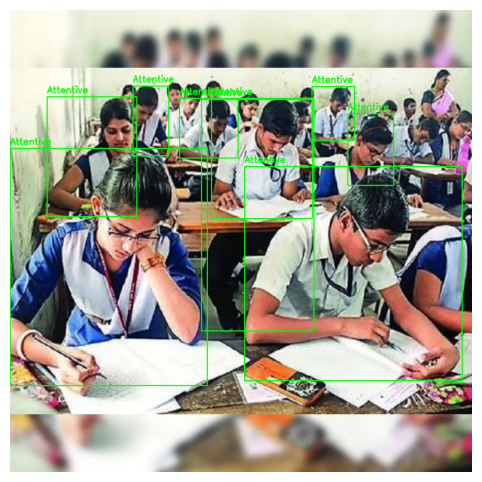

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import tensorflow as tf

# Load models (already trained)
yolo_model = YOLO("yolov8n.pt")
classifier = tf.keras.models.load_model("/content/attention_classifier_mobilenetv2.h5")

# Load NEW image
img_path = "/content/attentiveness-check.webp"   # 🔴 change ONLY if filename differs
img = cv2.imread(img_path)

if img is None:
    raise ValueError("Image not found. Check path.")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run YOLO
results = yolo_model(img_rgb)

# Process detections
for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])

        # YOLO class 0 = person
        if cls != 0:
            continue

        x1, y1, x2, y2 = map(int, box.xyxy[0])

        h = y2 - y1
        head_y2 = y1 + int(0.4 * h)

        crop = img_rgb[y1:head_y2, x1:x2]

        if crop.size == 0:
            continue

        # Preprocess like training
        crop = cv2.resize(crop, (224, 224))
        crop = crop / 255.0
        crop = np.expand_dims(crop, axis=0)

        pred = classifier.predict(crop, verbose=0)[0][0]

        if pred >= 0.5:
            label = "Attentive"
            color = (0, 255, 0)
        else:
            label = "Not Attentive"
            color = (0, 0, 255)

        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(
            img, label,
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.0, color, 2
        )

# Display result
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:loca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0

0: 448x640 9 persons, 20.0ms
Speed: 4.3ms preprocess, 20.0ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/re

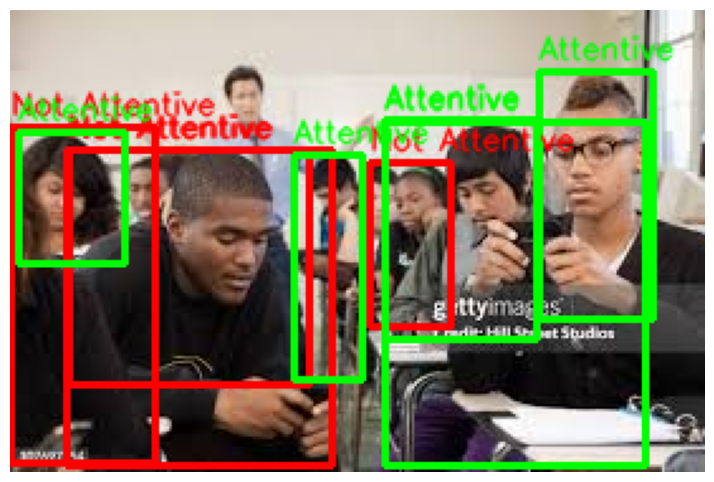

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import tensorflow as tf

# Load models (already trained)
yolo_model = YOLO("yolov8n.pt")
classifier = tf.keras.models.load_model("/content/attention_classifier_mobilenetv2.h5")

# Load NEW image
img_path = "/content/studentattentive.jpg"   # 🔴 change ONLY if filename differs
img = cv2.imread(img_path)

if img is None:
    raise ValueError("Image not found. Check path.")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run YOLO
results = yolo_model(img_rgb)

# Process detections
for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])

        # YOLO class 0 = person
        if cls != 0:
            continue

        x1, y1, x2, y2 = map(int, box.xyxy[0])

        h = y2 - y1
        head_y2 = y1 + int(0.4 * h)

        crop = img_rgb[y1:head_y2, x1:x2]

        if crop.size == 0:
            continue

        # Preprocess like training
        crop = cv2.resize(crop, (224, 224))
        crop = crop / 255.0
        crop = np.expand_dims(crop, axis=0)

        pred = classifier.predict(crop, verbose=0)[0][0]

        if pred >= 0.95:
            label = "Attentive"
            color = (0, 255, 0)
        else:
            label = "Not Attentive"
            color = (0, 0, 255)

        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(
    img,
    label,
    (x1, max(y1 - 5, 15)),   # keep text inside image
    cv2.FONT_HERSHEY_SIMPLEX,
    0.4,                    # 👈 smaller font
    color,
    1,                      # 👈 thinner text
    cv2.LINE_AA
)



# Display result
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:loca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0

0: 448x640 4 persons, 2 chairs, 1 dining table, 1 book, 18.5ms
Speed: 3.5ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatD

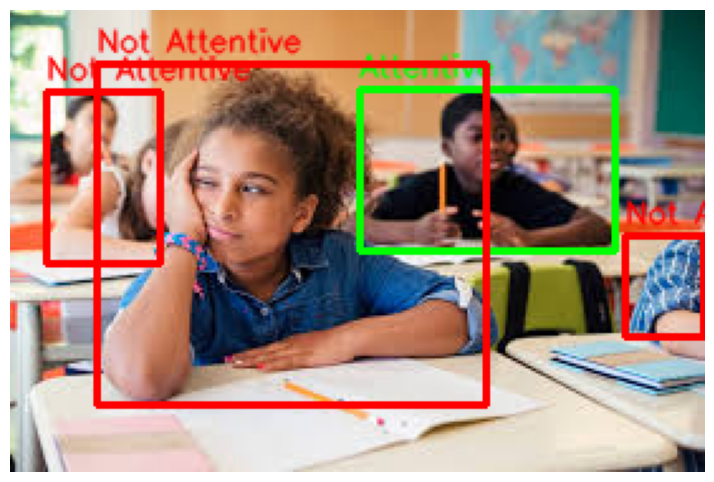

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import tensorflow as tf

# Load models (already trained)
yolo_model = YOLO("yolov8n.pt")
classifier = tf.keras.models.load_model("/content/attention_classifier_mobilenetv2.h5")

# Load NEW image
img_path = "/content/student-distracted.jpg"   # 🔴 change ONLY if filename differs
img = cv2.imread(img_path)

if img is None:
    raise ValueError("Image not found. Check path.")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run YOLO
results = yolo_model(img_rgb)

# Process detections
for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])

        # YOLO class 0 = person
        if cls != 0:
            continue

        x1, y1, x2, y2 = map(int, box.xyxy[0])

        h = y2 - y1
        head_y2 = y1 + int(0.4 * h)

        crop = img_rgb[y1:head_y2, x1:x2]

        if crop.size == 0:
            continue

        # Preprocess like training
        crop = cv2.resize(crop, (224, 224))
        crop = crop / 255.0
        crop = np.expand_dims(crop, axis=0)

        pred = classifier.predict(crop, verbose=0)[0][0]

        if pred >= 0.75:
            label = "Attentive"
            color = (0, 255, 0)
        else:
            label = "Not Attentive"
            color = (0, 0, 255)

        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(
         img,
         label,
         (x1, max(y1 - 5, 15)),   # keep text inside image
         cv2.FONT_HERSHEY_SIMPLEX,
         0.4,                    # 👈 smaller font
         color,
         1,                      # 👈 thinner text
         cv2.LINE_AA
)


# Display result
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
